<a href="https://colab.research.google.com/github/CaritoRamos/Predictive-and-Exploratory-Analysis-of-UNMSM-Exams/blob/main/An%C3%A1lisis_Predictivo_Admision_UNMSM_(EBR_y_EBA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREDICCION DE LA PROBABILIDAD DE INGRESO A LA UNMSM, MODALIDAD (EBR y EBA)**

# **1. DATA WRANGLING**

In [ ]:
#Librer√≠as
!pip install plotly
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from google.colab import files
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind


#Para el Modelo:
!pip install scikit-learn xgboost lightgbm catboost
import joblib #Para guardar el modelo entrenado
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 99.2/99.2 MB 8.3 MB/s eta 0:00:00


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/CaritoRamos/Predictive-and-Exploratory-Analysis-of-UNMSM-Exams/refs/heads/main/resultados_historico.csv')
df.head()

CODIGO                APELLIDOS Y NOMBRES          CARRERA   PUNTAJE  \
0  877220  ABAD CONCHA, MIKHAIL MARED MARZUK  MEDICINA HUMANA  1098.125   
1  861521        ABAD CONDORI, DANITZA ROCIO  MEDICINA HUMANA  1127.875   
2  866556         ABAD GOMEZ, EVELYN DAYANNA  MEDICINA HUMANA   818.875   
3  867339       ABAN CASTILLO, THALIA XIMENA  MEDICINA HUMANA   504.250   
4  876347     ABANTO BENITES, SAMANTHA SOFIA  MEDICINA HUMANA   775.875   

  PUESTO     ESTATUS                                          MODALIDAD  SEDE  \
0    NaN  NO INGRESO  EDUCACI√ìN B√ÅSICA REGULAR (EBR) Y EDUCACI√ìN B√ÅS...  LIMA   
1    NaN  NO INGRESO  EDUCACI√ìN B√ÅSICA REGULAR (EBR) Y EDUCACI√ìN B√ÅS...  LIMA   
2    NaN  NO INGRESO  EDUCACI√ìN B√ÅSICA REGULAR (EBR) Y EDUCACI√ìN B√ÅS...  LIMA   
3    NaN  NO INGRESO  EDUCACI√ìN B√ÅSICA REGULAR (EBR) Y EDUCACI√ìN B√ÅS...  LIMA   
4    NaN  NO INGRESO  EDUCACI√ìN B√ÅSICA REGULAR (EBR) Y EDUCACI√ìN B√ÅS...  LIMA   

    A√ëO  
0  2025  
1  2025  
2  2025  
3  2025  
4  2025

In [ ]:
#Tama√±o del Dataset (Filas y columnas)
df.shape

(145212, 9)

In [ ]:
#Tipo de Datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145212 entries, 0 to 145211
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   CODIGO               145212 non-null  int64 
 1   APELLIDOS Y NOMBRES  145212 non-null  object
 2   CARRERA              145212 non-null  object
 3   PUNTAJE              144225 non-null  object
 4   PUESTO               78027 non-null   object
 5   ESTATUS              145212 non-null  object
 6   MODALIDAD            145212 non-null  object
 7   SEDE                 145212 non-null  object
 8   A√ëO                  145212 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 10.0+ MB


# 1.1. VALORES DUPLICADOS

In [ ]:
#valores √∫nicos tiene cada columna
df.nunique()

CODIGO                 145194
APELLIDOS Y NOMBRES     89252
CARRERA                    84
PUNTAJE                 11190
PUESTO                    339
ESTATUS                     4
MODALIDAD                  12
SEDE                        8
A√ëO                         3
dtype: int64

In [ ]:
#valores duplicados
df["CODIGO"].duplicated().sum()

np.int64(18)

In [ ]:
#para conocer los 18 valores que est√°n duplicados
#df.loc[df["CODIGO"].duplicated(keep=False), "CODIGO"]
df.loc[df["CODIGO"].duplicated(), "CODIGO"].unique()

array([104325, 145572, 133507, 109730, 114921, 182147, 152897, 168431,
       111641, 119954, 114150, 160487, 132731, 192268, 183934, 101571,
       153501, 100179])

In [ ]:
#eliminando los valores a partir del segundo registro de los duplicados .
df = df[~(df["CODIGO"].duplicated(keep='first'))]

In [ ]:
df.nunique()

CODIGO                 145194
APELLIDOS Y NOMBRES     89251
CARRERA                    84
PUNTAJE                 11190
PUESTO                    339
ESTATUS                     4
MODALIDAD                  12
SEDE                        8
A√ëO                         3
dtype: int64

In [ ]:
df["CODIGO"].duplicated().sum()

np.int64(0)

# 1.2. VALORES NULOS

In [ ]:
#valores nulos en cada columna
print(df.isna().sum())


Valores nulos por columna:
CODIGO                     0
APELLIDOS Y NOMBRES        0
CARRERA                    0
PUNTAJE                  987
PUESTO                 67185
ESTATUS                    0
MODALIDAD                  0
SEDE                       0
A√ëO                        0
dtype: int64


In [ ]:
#ESTATUS de los postulantes con puntaje nulo
df[df["PUNTAJE"].isna()]["ESTATUS"].value_counts()

ESTATUS
AUSENTE    987
Name: count, dtype: int64

Observamos que todos los valores que tienen puntaje vac√≠o corresponden a los postulantes que estuvieron ausentes en el examen de admisi√≥n por lo tanto no rindieron el examen, se proceder√° a anular estos datos del an√°lisis predictivo.

In [ ]:
#cantidad de estudiantes ausentes respecto a los que s√≠ rindieron examen (INGRESO o NO INGRESO) por cada a√±o.
#primero se cuentan los valores
ausentes = (df['ESTATUS'] == "AUSENTE").sum()
presentes = (df['ESTATUS'] == "NO INGRESO").sum() + (df['ESTATUS'] == "INGRESO").sum()

In [ ]:
table = pd.crosstab(df['A√ëO'], df['ESTATUS'])  #tabla cruzada
table

ESTATUS  ANULADO  AUSENTE  INGRESO  NO INGRESO
A√ëO                                           
2023           0     1481     4662       28943
2024           1      560     5207       46453
2025           0      560     6983       50344

In [ ]:
fig = go.Figure()

#grafico de barras apiladas para cada categor√≠a
for estatus in table.columns:
    fig.add_trace(go.Bar(
        name=estatus,
        x=table.index.astype(str),
        y=table[estatus],
    ))
fig.update_layout(
    title='Estatus de Estudiantes por A√±o',
    xaxis_title='A√±o',
    yaxis_title='Cantidad',
    barmode='stack'

)
fig.show()

Ahora eliminaremos los datos de los postulantes con ESTATUS de AUSENTE y ANULADO

In [ ]:
df = df[~df['ESTATUS'].isin(['AUSENTE', 'ANULADO'])]
df

CODIGO                APELLIDOS Y NOMBRES  \
0       877220  ABAD CONCHA, MIKHAIL MARED MARZUK   
1       861521        ABAD CONDORI, DANITZA ROCIO   
2       866556         ABAD GOMEZ, EVELYN DAYANNA   
3       867339       ABAN CASTILLO, THALIA XIMENA   
4       876347     ABANTO BENITES, SAMANTHA SOFIA   
...        ...                                ...   
145207  120720    WALTTUONI ORTIZ, VALERIA COSETH   
145208  146939  YANQUI CAMPOS, ESTEFHANY KIMBERLY   
145209  171811       ZAMORA BANDA, CARMEN ADRIANA   
145210  104284           ZURITA JAIME, JHON JAIRO   
145211  176583        ZUTA ARROYO, GABRIEL ADRIAN   

                                                 CARRERA   PUNTAJE PUESTO  \
0                                        MEDICINA HUMANA  1098.125    NaN   
1                                        MEDICINA HUMANA  1127.875    NaN   
2                                        MEDICINA HUMANA   818.875    NaN   
3                                        MEDICINA HUMANA   504.250    NaN   
4                                        MEDICINA HUMANA   775.875    NaN   
...                                                  ...       ...    ...   
145207  PSICOLOG√çA ORGANIZACIONAL Y DE LA GESTI√ìN HUMANA  599.2500          
145208  PSICOLOG√çA ORGANIZACIONAL Y DE LA GESTI√ìN HUMANA  524.0000          
145209  PSICOLOG√çA ORGANIZACIONAL Y DE LA GESTI√ìN HUMANA  626.8750          
145210  PSICOLOG√çA ORGANIZACIONAL Y DE LA GESTI√ìN HUMANA  500.1250          
145211  PSICOLOG√çA ORGANIZACIONAL Y DE LA GESTI√ìN HUMANA  944.8750     20   

           ESTATUS                                          MODALIDAD  SEDE  \
0       NO INGRESO  EDUCACI√ìN B√ÅSICA REGULAR (EBR) Y EDUCACI√ìN B√ÅS...  LIMA   
1       NO INGRESO  EDUCACI√ìN B√ÅSICA REGULAR (EBR) Y EDUCACI√ìN B√ÅS...  LIMA   
2       NO INGRESO  EDUCACI√ìN B√ÅSICA REGULAR (EBR) Y EDUCACI√ìN B√ÅS...  LIMA   
3       NO INGRESO  EDUCACI√ìN B√ÅSICA REGULAR (EBR) Y EDUCACI√ìN B√ÅS...  LIMA   
4       NO INGRESO  EDUCACI√ìN B√ÅSICA REGULAR (EBR) Y EDUCACI√ìN B√ÅS...  LIMA   
...            ...                                                ...   ...   
145207  NO INGRESO  EDUCACI√ìN B√ÅSICA REGULAR (EBR) Y EDUCACI√ìN B√ÅS...  LIMA   
145208  NO INGRESO  EDUCACI√ìN B√ÅSICA REGULAR (EBR) Y EDUCACI√ìN B√ÅS...  LIMA   
145209  NO INGRESO  EDUCACI√ìN B√ÅSICA REGULAR (EBR) Y EDUCACI√ìN B√ÅS...  LIMA   
145210  NO INGRESO  EDUCACI√ìN B√ÅSICA REGULAR (EBR) Y EDUCACI√ìN B√ÅS...  LIMA   
145211     INGRESO  EDUCACI√ìN B√ÅSICA REGULAR (EBR) Y EDUCACI√ìN B√ÅS...  LIMA   

         A√ëO  
0       2025  
1       2025  
2       2025  
3       2025  
4       2025  
...      ...  
145207  2023  
145208  2023  
145209  2023  
145210  2023  
145211  2023  

[142592 rows x 9 columns]

In [ ]:
#Tama√±o del Dataset (Filas y columnas)
df.shape

(142592, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142592 entries, 0 to 145211
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   CODIGO               142592 non-null  int64 
 1   APELLIDOS Y NOMBRES  142592 non-null  object
 2   CARRERA              142592 non-null  object
 3   PUNTAJE              142592 non-null  object
 4   PUESTO               76394 non-null   object
 5   ESTATUS              142592 non-null  object
 6   MODALIDAD            142592 non-null  object
 7   SEDE                 142592 non-null  object
 8   A√ëO                  142592 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 10.9+ MB


Visualizamos valores diferentes en la columna PUNTAJE

In [ ]:
df['PUNTAJE'].unique()

array(['1098.125', '1127.875', '818.875', ..., '207.1250', '212.5000',
       '230.7500'], dtype=object)

In [ ]:
#ubicamos los valores que no son float:
df.loc[pd.to_numeric(df['PUNTAJE'], errors='coerce').isna(), 'PUNTAJE'].unique()

array(['Art. 68¬∫ Reglamento de Admisi√≥n / Ley Universitaria N.¬∞ 30220 y sus modificatorias',
       'Art. 71¬∫ Reglamento de Admisi √≥n / Ley Universitaria N.¬∞ 30220 y sus modificatorias',
       'Art. 71¬∫ Reglamento'], dtype=object)

In [ ]:
#eliminamos los valores NAN:
df = df[pd.to_numeric(df['PUNTAJE'], errors='coerce').notna()]
df.shape

(142047, 9)

Se tiene el dataset limpio al cual se le ha agregado una columna con el periodo del examen por a√±o (I y II)

In [ ]:
df_general = pd.read_csv('https://raw.githubusercontent.com/CaritoRamos/Predictive-Exploratory-Analysis-of-UNMSM-Exams/refs/heads/main/df_final.csv')
df_general.head()

CODIGO           APELLIDOS Y NOMBRES          CARRERA   PUNTAJE PUESTO  \
0  108704      ABAD GRANDA, ANDRE FAHET  MEDICINA HUMANA  1007.125          
1  159787       ABAD NEYRA, ANDREA TAIS  MEDICINA HUMANA   480.375          
2  100330  ABAL YACSAYAURI, SOFIA BELEN  MEDICINA HUMANA   504.875          
3  121362    ABANTO ARAUJO, PERCY ANGEL  MEDICINA HUMANA   733.625          
4  139925  ABANTO AYALA, LARISSA TAMARA  MEDICINA HUMANA   733.625          

      ESTATUS                                          MODALIDAD  SEDE   A√ëO  \
0  NO INGRESO  EDUCACI√ìN B√ÅSICA REGULAR (EBR) Y EDUCACI√ìN B√ÅS...  LIMA  2023   
1  NO INGRESO  EDUCACI√ìN B√ÅSICA REGULAR (EBR) Y EDUCACI√ìN B√ÅS...  LIMA  2023   
2  NO INGRESO  EDUCACI√ìN B√ÅSICA REGULAR (EBR) Y EDUCACI√ìN B√ÅS...  LIMA  2023   
3  NO INGRESO  EDUCACI√ìN B√ÅSICA REGULAR (EBR) Y EDUCACI√ìN B√ÅS...  LIMA  2023   
4  NO INGRESO  EDUCACI√ìN B√ÅSICA REGULAR (EBR) Y EDUCACI√ìN B√ÅS...  LIMA  2023   

  PERIODO  
0       I  
1       I  
2       I  
3       I  
4       I

In [ ]:
df = df_general[(df_general['MODALIDAD'].isin(['EDUCACI√ìN B√ÅSICA REGULAR (EBR) Y EDUCACI√ìN B√ÅSICA ALTERNATIVA (EBA)']))].copy()
df.head()

CODIGO           APELLIDOS Y NOMBRES          CARRERA   PUNTAJE PUESTO  \
0  108704      ABAD GRANDA, ANDRE FAHET  MEDICINA HUMANA  1007.125          
1  159787       ABAD NEYRA, ANDREA TAIS  MEDICINA HUMANA   480.375          
2  100330  ABAL YACSAYAURI, SOFIA BELEN  MEDICINA HUMANA   504.875          
3  121362    ABANTO ARAUJO, PERCY ANGEL  MEDICINA HUMANA   733.625          
4  139925  ABANTO AYALA, LARISSA TAMARA  MEDICINA HUMANA   733.625          

      ESTATUS                                          MODALIDAD  SEDE   A√ëO  \
0  NO INGRESO  EDUCACI√ìN B√ÅSICA REGULAR (EBR) Y EDUCACI√ìN B√ÅS...  LIMA  2023   
1  NO INGRESO  EDUCACI√ìN B√ÅSICA REGULAR (EBR) Y EDUCACI√ìN B√ÅS...  LIMA  2023   
2  NO INGRESO  EDUCACI√ìN B√ÅSICA REGULAR (EBR) Y EDUCACI√ìN B√ÅS...  LIMA  2023   
3  NO INGRESO  EDUCACI√ìN B√ÅSICA REGULAR (EBR) Y EDUCACI√ìN B√ÅS...  LIMA  2023   
4  NO INGRESO  EDUCACI√ìN B√ÅSICA REGULAR (EBR) Y EDUCACI√ìN B√ÅS...  LIMA  2023   

  PERIODO  
0       I  
1       I  
2       I  
3       I  
4       I

In [ ]:
df.shape

(138510, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138510 entries, 0 to 141036
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CODIGO               138510 non-null  int64  
 1   APELLIDOS Y NOMBRES  138510 non-null  object 
 2   CARRERA              138510 non-null  object 
 3   PUNTAJE              138510 non-null  float64
 4   PUESTO               138510 non-null  object 
 5   ESTATUS              138510 non-null  object 
 6   MODALIDAD            138510 non-null  object 
 7   SEDE                 138510 non-null  object 
 8   A√ëO                  138510 non-null  int64  
 9   PERIODO              138510 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 11.6+ MB


In [ ]:
df.describe()

CODIGO        PUNTAJE            A√ëO
count  138510.000000  138510.000000  138510.000000
mean   477730.261505     754.957137    2024.169020
std    280553.447064     243.338329       0.779487
min    100002.000000       0.000000    2023.000000
25%    218986.750000     577.750000    2024.000000
50%    550776.500000     745.625000    2024.000000
75%    770481.250000     922.625000    2025.000000
max    899996.000000    1717.370000    2025.000000

In [ ]:
df['A√ëO_PERIODO'] = df['A√ëO'].astype(str) + '-' + df['PERIODO'].astype(str) #nueva columna combinada de a√±o y periodo

# **2. EDA**

# 2.1. INGRESANTES POR A√ëO Y PERIODO

In [ ]:
tabla1 = pd.crosstab(index=[df['A√ëO'], df['PERIODO']], columns=df['ESTATUS'])
tabla1

ESTATUS       INGRESO  NO INGRESO
A√ëO  PERIODO                     
2023 I            402        7851
     II          3751       20348
2024 I           2124       26403
     II          2630       19238
2025 I           2553       25833
     II          3835       23542

In [ ]:
df_ingresantes = df[df['ESTATUS'] == 'INGRESO'].copy()  #se filtra solo los estudiantes que ingresaron en un nuevo dataframe

In [ ]:
#gr√°fico de barras apiladas
df_grouped = df_ingresantes['A√ëO_PERIODO'].value_counts().reset_index()
df_grouped.columns = ['A√ëO_PERIODO', 'CANTIDAD']

fig = px.bar(df_grouped,
             x='A√ëO_PERIODO',
             y='CANTIDAD',
             text='CANTIDAD',
             title='Cantidad de ingresantes por A√±o y Periodo',
             color='A√ëO_PERIODO')

fig.show()

# 2.2. VACANTES POR CARRERA Y POR A√ëO

In [ ]:
#se agrupa por carrera y a√±o
df_vacantes = df_ingresantes.groupby(['CARRERA', 'A√ëO'])['CODIGO'].count().reset_index(name='VACANTES')

#gr√°fico de barras horizontales
fig = px.bar(
    df_vacantes,
    x='VACANTES',
    y='CARRERA',
    color='A√ëO',  #Diferenciar a√±os por color
    title='Vacantes por Carrera y A√±o',
    orientation='h', #horizontal
    barmode='group', #barras agrupadas (no apiladas)
)

fig.update_layout(
    height = df_vacantes['CARRERA'].nunique() * 25,  # Ajusta la altura para que se vean todas las categor√≠as
    width=1200,   # Ajusta el ancho seg√∫n sea necesario
)

fig.show()

In [ ]:
df['CARRERA'].unique()

array(['MEDICINA HUMANA', 'OBSTETRICIA', 'ENFERMER√çA',
       'TEC. MED. LAB. CL√çNICO Y ANATOM√çA PATOL√ìGICA',
       'TEC. MED. TERAPIA F√çSICA Y REHABILITACI√ìN',
       'TEC. MED. RADIOLOG√çA', 'TEC. MED. TERAPIA OCUPACIONAL',
       'NUTRICION', 'FARMACIA Y BIOQU√çMICA', 'CIENCIAS DE LOS ALIMENTOS',
       'TOXICOLOG√çA', 'ODONTOLOG√çA', 'MEDICINA VETERINARIA', 'PSICOLOG√çA',
       'PSICOLOG√çA ORGANIZACIONAL Y DE LA GESTI√ìN HUMANA', 'DERECHO',
       'CIENCIA POL√çTICA', 'LITERATURA', 'FILOSOF√çA', 'LINGU√çSTICA',
       'COMUNICACI√ìN SOCIAL', 'ARTE',
       'BIBLIOTECOLOG√çA Y CIENCIAS DE LA INFORMACI√ìN', 'DANZA',
       'CONSERVACI√ìN Y RESTAURACI√ìN', 'EDUCACI√ìN INICIAL',
       'EDUCACI√ìN PRIMARIA', 'EDUCACI√ìN SECUNDARIA', 'EDUCACI√ìN F√çSICA',
       'QU√çMICA', 'INGENIER√çA QU√çMICA', 'INGENIER√çA AGROINDUSTRIAL',
       'ADMINISTRACI√ìN', 'ADMINISTRACI√ìN DE TURISMO',
       'ADMINISTRACI√ìN DE NEGOCIOS INTERNACIONALES',
       'CIENCIAS BIOL√ìGICAS', 'GEN√âTICA Y

# 2.3. DIEZ CARRERAS M√ÅS DEMANDADAS POR A√ëO

In [ ]:
#se filtra la informaci√≥n a graficar en un nuevo dataframe:
#Agrupamos a√±o, periodo y carrera, y contamos la cantidad de postulaciones
df_agrupado = df_ingresantes.groupby(['A√ëO_PERIODO', 'CARRERA']).size().reset_index(name='CANTIDAD')

#top 10 por cada a√±o-periodo
top10_df = (
    df_agrupado
    .sort_values(['A√ëO_PERIODO', 'CANTIDAD'], ascending=[True, False])
    .groupby('A√ëO_PERIODO')
    .head(10)
)

top10_df = top10_df[['A√ëO_PERIODO', 'CARRERA', 'CANTIDAD']]
top10_df

A√ëO_PERIODO                                           CARRERA  CANTIDAD
3        2023-I                                   MEDICINA HUMANA        55
8        2023-I                                        PSICOLOG√çA        48
1        2023-I                                        ENFERMER√çA        46
6        2023-I                                       OBSTETRICIA        45
2        2023-I                             FARMACIA Y BIOQU√çMICA        25
7        2023-I                                       ODONTOLOG√çA        25
5        2023-I                                         NUTRICION        24
9        2023-I  PSICOLOG√çA ORGANIZACIONAL Y DE LA GESTI√ìN HUMANA        21
4        2023-I                              MEDICINA VETERINARIA        20
11       2023-I                              TEC. MED. RADIOLOG√çA        19
29      2023-II                                      CONTABILIDAD       204
31      2023-II                                           DERECHO       146
15      2023-II                                    ADMINISTRACI√ìN       134
76      2023-II                   PRESUPUESTO Y FINANZAS P√öBLICAS       129
70      2023-II                                   MEDICINA HUMANA       106
21      2023-II        AUDITOR√çA EMPRESARIAL Y DEL SECTOR P√öBLICO       105
46      2023-II                                GESTI√ìN TRIBUTARIA       105
35      2023-II                                  EDUCACI√ìN F√çSICA        99
62      2023-II                    INGENIER√çA MEC√ÅNICA DE FLUIDOS        93
17      2023-II                         ADMINISTRACI√ìN DE TURISMO        91
104      2024-I                                           DERECHO       134
102      2024-I                                      CONTABILIDAD       106
87       2024-I                                    ADMINISTRACI√ìN        93
134      2024-I                             INGENIER√çA INDUSTRIAL        77
105      2024-I                                          ECONOM√çA        66
107      2024-I                                  ECONOM√çA P√öBLICA        65
106      2024-I                            ECONOM√çA INTERNACIONAL        64
111      2024-I                              EDUCACI√ìN SECUNDARIA        61
88       2024-I        ADMINISTRACI√ìN DE NEGOCIOS INTERNACIONALES        57
143      2024-I                                   MEDICINA HUMANA        55
179     2024-II                                           DERECHO       163
177     2024-II                                      CONTABILIDAD       113
160     2024-II                                    ADMINISTRACI√ìN       104
209     2024-II                             INGENIER√çA INDUSTRIAL        74
181     2024-II                            ECONOM√çA INTERNACIONAL        69
182     2024-II                                  ECONOM√çA P√öBLICA        69
180     2024-II                                          ECONOM√çA        68
163     2024-II                         ADMINISTRACI√ìN DE TURISMO        65
186     2024-II                              EDUCACI√ìN SECUNDARIA        65
162     2024-II        ADMINISTRACI√ìN DE NEGOCIOS INTERNACIONALES        61
257      2025-I                                           DERECHO       134
255      2025-I                                      CONTABILIDAD       130
237      2025-I                                    ADMINISTRACI√ìN       103
258      2025-I                                          ECONOM√çA        77
287      2025-I                             INGENIER√çA INDUSTRIAL        75
239      2025-I        ADMINISTRACI√ìN DE NEGOCIOS INTERNACIONALES        64
259      2025-I                            ECONOM√çA INTERNACIONAL        64
260      2025-I                                  ECONOM√çA P√öBLICA        64
305      2025-I                                        PSICOLOG√çA        61
264      2025-I                              EDUCACI√ìN SECUNDARIA        60
334     2025-II                                      CONTABILIDAD       199
337     

In [ ]:
#gr√°fico
fig = px.bar(
    top10_df,
    x='CANTIDAD',
    y='CARRERA',
    color='A√ëO_PERIODO',
    barmode='group',
    title='Top 10 carreras m√°s demandadas por a√±o y periodo',
    height=600
)

fig.update_layout(yaxis={'categoryorder': 'total ascending'})
fig.show()

# 2.2. SIMULACI√ìN PARA DETERMINAR ESTUDIANTES QUE INGRESARON CON PUNTAJES MENORES A 900 PUNTOS



El puntaje m√≠nimo aprobatorio de 900 puntos hab√≠a sido establecido como requisito para alcanzar una vacante. Sin embargo, esta regla fue dejada sin efecto en algunos procesos de admisi√≥n (2023 y 2025 modalidades EBR Y EBA), lo que permiti√≥ el ingreso de postulantes que no alcanzaban dicho umbral.

El objetivo de este an√°lisis es visualizar cu√°ntos ingresantes no habr√≠an accedido a una vacante si se hubiera mantenido vigente el puntaje m√≠nimo. Se evidencia que, en varias carreras, un n√∫mero significativo de estudiantes accedi√≥ con puntajes por debajo del m√≠nimo, lo que puede tener implicancias en t√©rminos de calidad acad√©mica, equidad del proceso y revisi√≥n de pol√≠ticas de admisi√≥n.

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

#se iltras aquellos ingresantes en la modalidad EBR/EBA con puntaje < 900 para los a√±os 2023 y 2025
df_filtrado = df_ingresantes[
    (df_ingresantes['A√ëO'].isin([2023, 2025])) &
    (df_ingresantes['PUNTAJE'] < 900)
].copy()

df_filtrado.head()

CODIGO              APELLIDOS Y NOMBRES      CARRERA  PUNTAJE PUESTO  \
3900  145068  ALARCON ARIAS, MARIA DEL CARMEN  OBSTETRICIA  817.000     34   
3915  158599      ASCA CASTRO, MARIA FERNANDA  OBSTETRICIA  817.000     33   
3944  156433   CARDENAS AYALA, MARIANA NAYELI  OBSTETRICIA  800.375     37   
3956  163741     CHAVEZ ZURITA, ARIANA XIMENA  OBSTETRICIA  790.500     42   
3958  156698    CHIRINOS QUISPE, ANA CRISTINA  OBSTETRICIA  890.500     23   

      ESTATUS                                          MODALIDAD  SEDE   A√ëO  \
3900  INGRESO  EDUCACI√ìN B√ÅSICA REGULAR (EBR) Y EDUCACI√ìN B√ÅS...  LIMA  2023   
3915  INGRESO  EDUCACI√ìN B√ÅSICA REGULAR (EBR) Y EDUCACI√ìN B√ÅS...  LIMA  2023   
3944  INGRESO  EDUCACI√ìN B√ÅSICA REGULAR (EBR) Y EDUCACI√ìN B√ÅS...  LIMA  2023   
3956  INGRESO  EDUCACI√ìN B√ÅSICA REGULAR (EBR) Y EDUCACI√ìN B√ÅS...  LIMA  2023   
3958  INGRESO  EDUCACI√ìN B√ÅSICA REGULAR (EBR) Y EDUCACI√ìN B√ÅS...  LIMA  2023   

     PERIODO A√ëO_PERIODO  
3900       I      2023-I  
3915       I      2023-I  
3944       I      2023-I  
3956       I      2023-I  
3958       I      2023-I

In [ ]:
#agrupamos por a√±o y carrera
df_cantidad = df_filtrado.groupby(['A√ëO_PERIODO', 'CARRERA']).size().reset_index(name='CANTIDAD')

#gr√°fico
fig = px.bar(
    df_cantidad,
    x='CANTIDAD',
    y='CARRERA',
    color='A√ëO_PERIODO',
    orientation='h',
    title='Estudiantes que ingresaron con puntaje menor a 900 (no debieron ingresar)',
    height=700,
    labels={'CANTIDAD': 'N¬∞ de ingresantes', 'CARRERA': 'Carrera'}
)

fig.update_layout(
    yaxis={'categoryorder': 'total ascending'},
    showlegend=False
)
fig.update_yaxes(matches=None)  # evita que las subplots compartan el eje Y
fig.show()

In [ ]:
#para visualizarlo mejor en un gr√°fico de dispersi√≥n
df_puntajes = df_ingresantes.groupby(['A√ëO_PERIODO', 'CARRERA', 'PUNTAJE']).size().reset_index(name='CANTIDAD')
#columna que clasifique por puntaje
df_puntajes['CLASIFICACI√ìN'] = df_puntajes['PUNTAJE'].apply(
    lambda x: '>= 900' if x >= 900 else '< 900'
)

#gr√°fico de dispersi√≥n
fig = px.scatter(
    df_puntajes,
    y='PUNTAJE',
    color='CLASIFICACI√ìN',
    title='Distribuci√≥n de puntajes de ingresantes',
    labels={'PUNTAJE': 'Puntaje de Ingreso', 'CLASIFICACI√ìN': 'Clasificaci√≥n por Puntaje'},
    opacity=0.4,  # transparencia
    color_discrete_map={
        '>= 900': 'green',
        '< 900': 'orange'
    }
)

#l√≠nea horizontal en puntaje 900
fig.add_hline(
    y=900,
    line_dash='dash',
    line_color='red',
    annotation_text='Puntaje m√≠nimo (900)',
    annotation_position='top left'
)

fig.update_layout(
    height=700,
    width=1000,
    xaxis_title='Cantidad de ingresantes',
    yaxis_title='Puntaje',
    xaxis_showticklabels=False
)

fig.show()

# **3. PREDICTIVE MODEL**

In [ ]:
df['CARRERA'].nunique()

84

In [ ]:
df['SEDE'].nunique()

8

# 3.1. AN√ÅLISIS UNIVARIADO

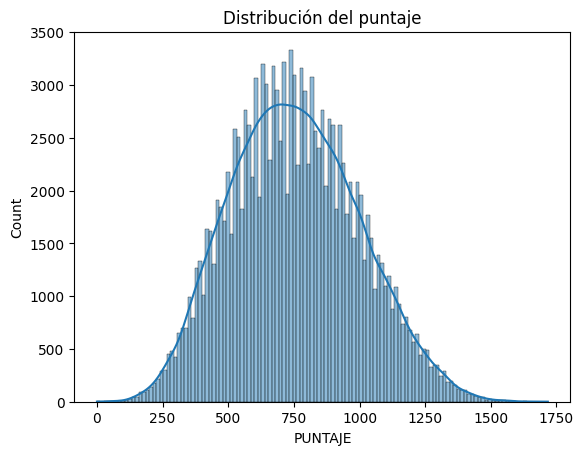

In [ ]:
#solo para variable PUNTAJE que es num√©rica
sns.histplot(df['PUNTAJE'], kde=True)
plt.title('Distribuci√≥n del puntaje')
plt.show()

# 3.2. VARIABLES QUE EJERCEN SOBRE EL TARGET


In [ ]:
#se elimina la variable PUESTO al contener valores nulos que no pueden tratarse.
df.drop(['PUESTO'],axis = 1, inplace = True)

#se elimina las variables CODIGO y APELLIDOS Y NOMBRES, por ser irrelevantes.
df.drop(['CODIGO', 'APELLIDOS Y NOMBRES', 'A√ëO', 'A√ëO_PERIODO', 'MODALIDAD'],axis = 1, inplace = True)
df.head()

CARRERA   PUNTAJE     ESTATUS  SEDE PERIODO
0  MEDICINA HUMANA  1007.125  NO INGRESO  LIMA       I
1  MEDICINA HUMANA   480.375  NO INGRESO  LIMA       I
2  MEDICINA HUMANA   504.875  NO INGRESO  LIMA       I
3  MEDICINA HUMANA   733.625  NO INGRESO  LIMA       I
4  MEDICINA HUMANA   733.625  NO INGRESO  LIMA       I

In [ ]:
#se transforma la variable ESTATUS a binaria:
df['TARGET'] = df['ESTATUS'].map({'NO INGRESO': 0, 'INGRESO': 1})
df.drop(columns=['ESTATUS'], inplace=True)

In [ ]:
df.head()

CARRERA   PUNTAJE  SEDE PERIODO  TARGET
0  MEDICINA HUMANA  1007.125  LIMA       I       0
1  MEDICINA HUMANA   480.375  LIMA       I       0
2  MEDICINA HUMANA   504.875  LIMA       I       0
3  MEDICINA HUMANA   733.625  LIMA       I       0
4  MEDICINA HUMANA   733.625  LIMA       I       0

In [ ]:
#asignaci√≥n variables categ√≥ricas y num√©ricas:
target = 'TARGET'
cat_var = ['CARRERA', 'SEDE', 'PERIODO']
num_var = ['PUNTAJE']

VARIABLES CATEGORICAS

In [ ]:
def chi2_test(df, cat_vars, target):
    results = []
    for var in cat_vars:
        tabla = pd.crosstab(df[var], df[target])
        chi2, p, dof, ex = chi2_contingency(tabla)
        results.append({'Variable': var, 'p-value': p})
    return pd.DataFrame(results).sort_values('p-value')

chi2_results = chi2_test(df, cat_var, 'TARGET')
display(chi2_results)

Variable        p-value
0  CARRERA   0.000000e+00
1     SEDE   0.000000e+00
2  PERIODO  2.396227e-289

<ipython-input-30-96beb816f3e8>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




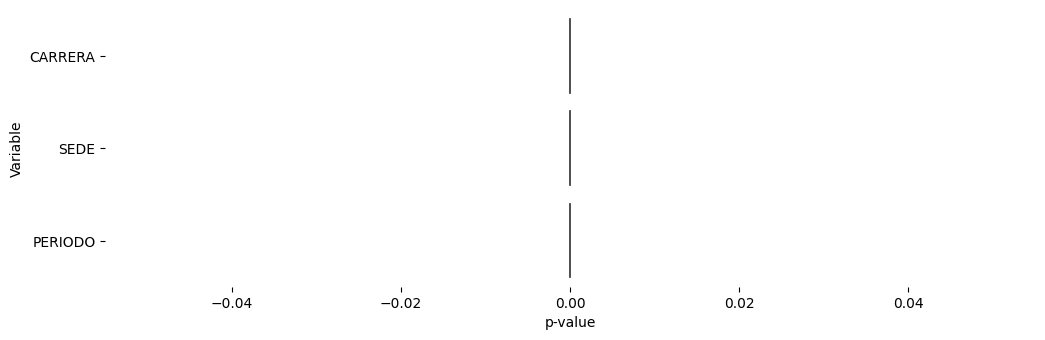

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(chi2_results['Variable'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(chi2_results, x='p-value', y='Variable', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Todos los p-values son mucho menores que 0.05, lo que indica que existe una asociaci√≥n estad√≠sticamente significativa entre cada una de estas variables y  a probabilidad de ingreso (TARGET)

VARIABLES NUMERICAS (SOLO TARGET)

In [ ]:
def ttest_variables(df, num_vars, target):
    results = []
    grupo_1 = df[df[target] == 1]
    grupo_0 = df[df[target] == 0]
    for var in num_vars:
        t_stat, p_val = ttest_ind(grupo_1[var], grupo_0[var], nan_policy='omit')
        results.append({'Variable': var, 'p-value': p_val})
    return pd.DataFrame(results)

ttest_results = ttest_variables(df, num_var, 'TARGET')
display(ttest_results)

Variable  p-value
0  PUNTAJE      0.0

Un p-value de 0.0 (o tan bajo que se redondea a cero) significa que existe una diferencia estad√≠sticamente significativa entre los puntajes de quienes ingresaron y los que no.

# **4. MODELLING**

# 4.1. VARIABLE TRANSFORMATION

### üìä Divisi√≥n del dataset

Primero dividimos el dataset considerando lo siguiente:

| Conjunto       | Porcentaje | Uso                                              |
|----------------|------------|--------------------------------------------------|
| **Entrenamiento** | 70%         | Entrenar el modelo                              |
| **Validaci√≥n**    | 15%         | Ajustar hiperpar√°metros                         |
| **Prueba (Test)** | 15%         | Evaluar el rendimiento final del modelo         |



In [ ]:
X = df.drop(columns=[target])
y = df[target]

#separaci√≥n del 15% de prueba (test):
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

#divisi√≥n del 85% restante en entrenamiento (70%) y validaci√≥n(15%):
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, random_state=42, stratify=y_temp)

#confirmamos proporciones
print(f'Train: {len(X_train)} registros')
print(f'Validaci√≥n: {len(X_val)} registros')
print(f'Test: {len(X_test)} registros')

Train: 96953 registros
Validaci√≥n: 20780 registros
Test: 20777 registros


Ahora hacemos la transformaci√≥n de las variables, se realiza despu√©s de la partici√≥n del dataset porque de lo contrario, estar√≠a permitiendo que informaci√≥n del conjunto de test/validaci√≥n "se filtre" al entrenamiento. A esto se le llama data leakage.
Si se aplica StandardScaler sobre todo el dataset antes de dividirlo, se estar√≠a calculando la media y desviaci√≥n est√°ndar usando tambi√©n los datos de prueba, lo cual contamina la evaluaci√≥n final.

Lo mismo pasa con OneHotEncoder: si hay una categor√≠a rara que solo aparece en test, y ya se us√≥ para definir las columnas, se estar√≠a dando pistas al modelo desde antes de tiempo.

In [ ]:
#se transforman las variables categ√≥ricas con OneHotEncoder y se escalan las num√©ricas con StandardScaler.
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_var),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_var)
])

StandardScaler: Normaliza las variables num√©ricas.
OneHotEncoder: Convierte las variables categ√≥ricas en variables dummy (0 y 1).

# **4.2. DATA TRAINING**

In [ ]:
#funci√≥n que eval√∫a varios modelos de clasificaci√≥n. para cada modelo se especifica los hiperpar√°metros a ajustar.

def evaluate_classifiers(X_train, y_train, X_val, y_val, X_test, y_test, preprocessor): #funci√≥n itera sobre un diccionario de modelos, cada modelo tiene su propio conjunto de hiperpar√°metros.
    #balanceo de datos
    distribucion_clases = y_train.value_counts() #verifica la distribuci√≥n de clases
    print("Distribuci√≥n de Clases en el Conjunto de Entrenamiento:")
    print(distribucion_clases)

    #proporci√≥n de clases
    proporci√≥n = distribucion_clases.min() / distribucion_clases.max()
    print(f"Proporci√≥n de clases: {proporci√≥n:.4f}")

    #oversampling si hay desbalance significativo
    if proporci√≥n < 0.1:  #si la clase minoritaria es menos del 10% de la mayoritaria
        oversampler = RandomOverSampler(random_state=42)
        X_train, y_train = oversampler.fit_resample(X_train, y_train)
        print("Oversampling aplicado. Nueva distribuci√≥n de clases:")
        print(y_train.value_counts())
    else:
        print("No se aplic√≥ oversampling, la distribuci√≥n de clases es aceptable.")

    # Diccionario de modelos con hiperpar√°metros
    models = {
        'Random Forest': (RandomForestClassifier(), {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [10, 20, None]
        }),
        'Logistic Regression': (LogisticRegression(max_iter=1000), {
            'classifier__C': [0.1, 1, 10]
        }),
        'XGBoost': (XGBClassifier(use_label_encoder=False, eval_metric='logloss'), {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [3, 5]
        }),
        'KNN': (KNeighborsClassifier(), {
            'classifier__n_neighbors': [3, 5, 7]
        }),
        'SVM': (SVC(), {
            'classifier__C': [0.1, 1, 10],
            'classifier__kernel': ['linear', 'rbf']
        })
    }

    results = []
    best_models = {}

    #para cada modelo se crea un Pipeline que incluye el preprocesamiento y el clasificador.
    for name, (clf, params) in models.items():
        print(f"\n Entrenando y ajustando hiperpar√°metros para: {name}")
        pipeline = Pipeline(steps=[
            ('preprocessing', preprocessor),
            ('classifier', clf)
        ])
        #ajuste del modelo
        grid = GridSearchCV(pipeline, param_grid=params, cv=3, scoring='accuracy', n_jobs=-1)  #se usa GridSearchCV para ajustar el modelo,encontrar la mejor combinaci√≥n de hiperpar√°metros para cada modelo, evaluando su rendimiento mediante validaci√≥n cruzada.
        grid.fit(X_train, y_train)

        best_model = grid.best_estimator_  #se entrena el modelo y se eval√∫a su precisi√≥n en el conjunto de prueba (X_test).
        y_pred_test = best_model.predict(X_test)

        acc = accuracy_score(y_test, y_pred_test)  #una vez encontrado el mejor modelo, se predice el conjunto de prueba y se calcula la precisi√≥n (accuracy).
        print(f"‚úÖ {name} - Accuracy en test: {acc:.4f}")

        results.append({    #se guardan los resultados, se almacenan en una lista y convierten en un DataFrame para su visualizaci√≥n.
            'Model': name,
            'Accuracy': acc,
            'Best Params': grid.best_params_
        })

        best_models[name] = best_model #guarda el mejor modelo por nombre

    #resultados como tabla
    df_results = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
    print("\nüìä Resultados Comparativos:")
    print(df_results)

    #modelo con mejor accuracy
    best_model_name = df_results.iloc[0]['Model']
    best_model_overall = best_models[best_model_name]

    #grafico de los accuracy
    plt.figure(figsize=(10, 5))
    sns.barplot(x='Accuracy', y='Model', data=df_results, palette='viridis')
    plt.title('Comparaci√≥n de Accuracy por Modelo')
    plt.xlabel('Accuracy en Test')
    plt.ylabel('Modelo')
    plt.xlim(0, 1)
    plt.show()

    return best_models, df_results, best_model_name, best_model_overall

Distribuci√≥n de Clases en el Conjunto de Entrenamiento:
TARGET
0    86247
1    10706
Name: count, dtype: int64
Proporci√≥n de clases: 0.1241
No se aplic√≥ oversampling, la distribuci√≥n de clases es aceptable.

 Entrenando y ajustando hiperpar√°metros para: Random Forest
‚úÖ Random Forest - Accuracy en test: 0.9459

 Entrenando y ajustando hiperpar√°metros para: Logistic Regression
‚úÖ Logistic Regression - Accuracy en test: 0.9395

 Entrenando y ajustando hiperpar√°metros para: XGBoost


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[19:37:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




‚úÖ XGBoost - Accuracy en test: 0.9502

 Entrenando y ajustando hiperpar√°metros para: KNN
‚úÖ KNN - Accuracy en test: 0.9477

 Entrenando y ajustando hiperpar√°metros para: SVM
‚úÖ SVM - Accuracy en test: 0.9489

üìä Resultados Comparativos:
                 Model  Accuracy  \
2              XGBoost  0.950185   
4                  SVM  0.948934   
3                  KNN  0.947731   
0        Random Forest  0.945902   
1  Logistic Regression  0.939549   

                                         Best Params  
2  {'classifier__max_depth': 5, 'classifier__n_es...  
4  {'classifier__C': 10, 'classifier__kernel': 'r...  
3                     {'classifier__n_neighbors': 7}  
0  {'classifier__max_depth': None, 'classifier__n...  
1                               {'classifier__C': 1}  


<ipython-input-34-2b2a609027b2>:83: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




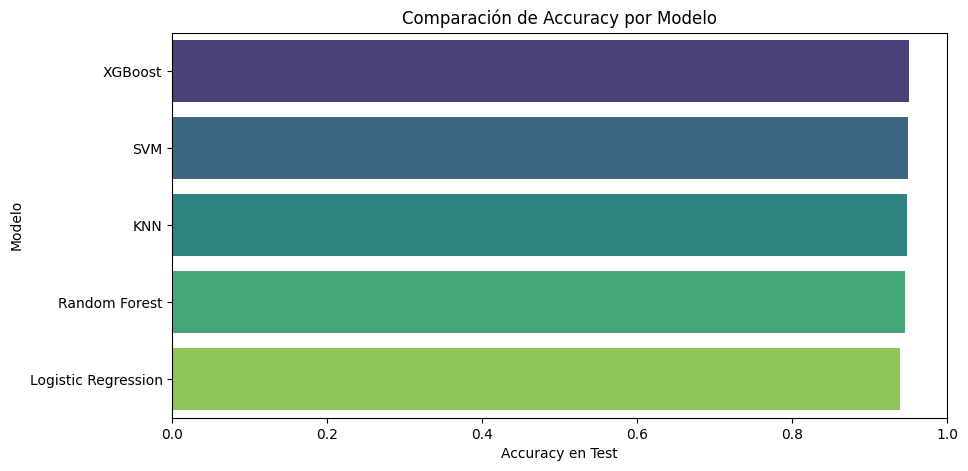

In [ ]:
best_models, df_results, best_model_name, best_model_overall = evaluate_classifiers(X_train, y_train, X_val, y_val, X_test, y_test, preprocessor)

In [ ]:
print(f"Mejor modelo: {best_model_name}")

Mejor modelo: XGBoost


In [ ]:
#se guarda el mejor modelo en un archivo .pkl
joblib.dump(best_model_overall, 'modelo_entrenado.pkl')

['modelo_entrenado.pkl']

In [ ]:
#para cargar el modelo
modelo = joblib.load('modelo_entrenado.pkl')

#4.3. MODEL VALIDATION

üîç Accuracy en Validaci√≥n: 0.9508

üìã Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     18485
           1       0.86      0.67      0.75      2295

    accuracy                           0.95     20780
   macro avg       0.91      0.83      0.86     20780
weighted avg       0.95      0.95      0.95     20780



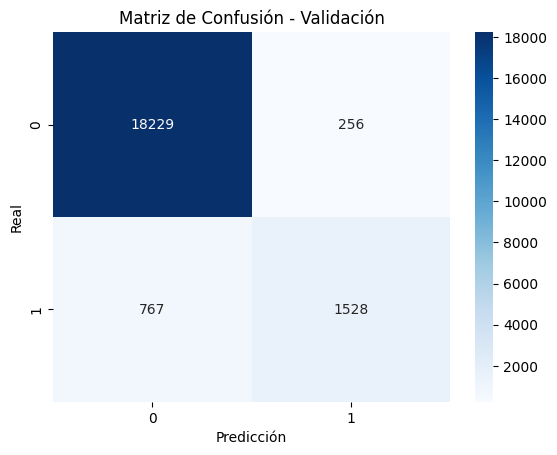

In [ ]:
#para predecir en el conjunto de validaci√≥n
y_pred_val = modelo.predict(X_val)

#se calcula el accuracy
acc_val = accuracy_score(y_val, y_pred_val)
print(f"üîç Accuracy en Validaci√≥n: {acc_val:.4f}")

#se genera un reporte completo
print("\nüìã Classification Report:")
print(classification_report(y_val, y_pred_val))

#matriz de confusi√≥n
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_val, y_pred_val)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusi√≥n - Validaci√≥n')
plt.xlabel('Predicci√≥n')
plt.ylabel('Real')
plt.show()

In [ ]:
#se simulan nuevos postulantes
new_data = pd.DataFrame([
    {'PUNTAJE': 1200, 'CARRERA': 'INGENIER√çA INDUSTRIAL','SEDE': 'LIMA', 'PERIODO': 'I'},
    {'PUNTAJE': 950,  'CARRERA': 'MEDICINA HUMANA', 'SEDE': 'HUANCAYO', 'PERIODO': 'II'},
    {'PUNTAJE': 1100, 'CARRERA': 'ADMINISTRACI√ìN DE EMPRESAS','SEDE': 'LIMA', 'PERIODO': 'II'}
])

#predicci√≥n del ingreso
predicciones = modelo.predict(new_data)
print(predicciones)

[0 0 1]
